# Getting started with pandas.
Wes McKinney "Python for Data Analysis, 3rd Edition" Chapter 5:  
https://learning.oreilly.com/library/view/python-for-data/9781098104023/ch05.html
  

### Agenda
5.1 Introduction to pandas Data Structures  
[Series](#Series)  
[DataFrame](#DataFrame)  
Index Objects  
5.2 Essential Functionality  
Reindexing  
Dropping Entries from an Axis  
[Indexing, Selection, and Filtering](#Indexing)  
[Selection on DataFrame with loc and iloc](#Selection)  
OPTIONAL: Integer indexing pitfalls  
OPTIONAL: Pitfalls with chained indexing  
Arithmetic and Data Alignment  
Arithmetic methods with fill values  
Operations between DataFrame and Series  
Function Application and Mapping  
[Sorting and Ranking](#Sorting)  
Axis Indexes with Duplicate Labels  
[5.3 Summarizing and Computing Descriptive Statistics](#Summarizing)   
[Correlation and Covariance](#Correlation)  
Unique Values, Value Counts, and Membership  


In [162]:
from pandas import Series, DataFrame
import pandas as pd

import numpy as np


## Series
[**Series**](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. 

### Create an Object
The simpliest Series is formed from only an array of data.  
  
The string representation of a Series displayed interactively shows the index on the left and the values on the right. Since we did not specify an index for the data, a default one consisting of the integers 0 through N - 1 (where N is the length of the data) is created. 

In [163]:
obj = Series ([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Series values:

In [164]:
# also obj.array
obj.values

array([ 4,  7, -5,  3])

Series index:

In [165]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Create a Series with an index, identifying each data point:

In [166]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [167]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

### Data selection

Compared with NumPy arrays, you can use labels in the index when selecting single values or a set of values.  
  
Select a single Series value by using an index:

In [168]:
obj2['a']

-5

Select multiple values by using an array or list:

In [169]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    4
dtype: int64

### Series Filtering 
Filtering with a boolean array preserves the index-value link:

In [170]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [171]:
obj > 0

0     True
1     True
2    False
3     True
dtype: bool

In [172]:
obj[obj > 0]

0    4
1    7
3    3
dtype: int64

### Scalar Multiplication
Preserves the index-value link as well:

In [173]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [174]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

### A Series is like a Dictionary

Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping of index values to data values. 

In [175]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

Does a key exist?

In [176]:
'b' in obj2

True

### Create Series from a Dictionary
When you are only passing a dictionary, the index in the resulting Series will respect the order of the keys according to the dictionary’s keys method, which **depends on the key insertion order**. You can override this by passing an index with the dictionary keys in the order you want them to appear in the resulting Series:

In [177]:
sdata = {'Texas': 7100, 
        'Ohio': 35000, 
        'Oregon': 16000, 
        'Utah': 5000,
        'NY': 1
         }

obj3 = Series(sdata, index = ['NY', 'Ohio', 'Oregon', 'Utah'])

# Keys will be in sorted order (?):
obj3

NY            1
Ohio      35000
Oregon    16000
Utah       5000
dtype: int64

## DataFrame
A DataFrame represents a rectangular table of data and contains an ordered, named collection of columns, each of which can be a different value type (numeric, string, Boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dictionary of Series all sharing the same index. 
  
Create DataFrame from a dict.  Lists or NumPy arrays are of equal length.  The resulting DataFrame will have its index assigned automatically, as with Series, and the columns are placed according to the order of the keys in data (which depends on their insertion order in the dictionary):

In [178]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
       'year': [2000, 2001, 2002, 2001, 2002],
       'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

frame = DataFrame(data)

# Similar to Series, the resulting dictionary has its index assigned automatically, 
# and the columns are placed in sorted order.
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Create DataFrame from a dict and columns.  
  
DataFrame columns are created exactly as you specify:

In [179]:
df = DataFrame(data, columns=['year', 'state', 'pop'])
df

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


Display the first 5 records:

In [180]:
df.head()

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [181]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                          index=['one', 'two', 'three', 'four', 'five'])

# debt column is not in a dictionary
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [182]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five'], dtype='object')

In [183]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

### DataFrame column can be retrieved as Series:
Column has the same index as a DataFrame and has the proper name.  
  
frame2["columnName"] works for any column name, but frame2.column works only when the column name is a valid Python variable name and does not conflict with any of the method names in DataFrame. For example, if a column’s name contains whitespace or symbols other than underscores, it cannot be accessed with the dot attribute method.
  
Note that the returned Series have the same index as the DataFrame, and their name attribute has been appropriately set.

In [184]:
#by dictionary-like notation:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [185]:
#by attribute:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

Columns can be assigned a value or an array of values:

In [186]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [229]:
# numpy arange() returns an array.  
# Length of an array must equal the length of the DataFrame.
frame2['debt'] = np.arange(5)
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False


Updating column values with a Series object will match indexes or 'NaN' if no matching index.

In [188]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4


In [189]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [190]:
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


Assigning a column that does not exist will create a new column.  If state is equal to 'Ohio', then assign 'Eastern' to true:

In [191]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


<a id="Indexing"></a>
## Indexing, Selection, and Filtering 

Series indexing (obj[...]) works analogously to NumPy array indexing, except you can use the Series’s index values instead of only integers. Here are some examples of this: 

In [192]:
obj = pd.Series(np.arange(4.), index=["a", "b", "c", "d"])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [193]:
obj["b"]

1.0

Same as above - select the value with row index 1 (second row):

In [194]:
obj[1]

1.0

Select a slice of rows with indexes 2 and 3:

In [195]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

<a id="Selection"></a>
### Selection on DataFrame with *loc* and *iloc*
#### *loc* and *iloc* allow you to select a subset of the rows and columns: 
**loc** - is label-based, which means that we have to specify the name of the rows and columns that we need to filter out.  
**iloc** - is integer index-based. We have to specify rows and columns by their integer index.

In [196]:
data = pd.DataFrame (np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Select row by label:

In [197]:
data.loc['Colorado']

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

Select single row & multiple columns by label:

In [198]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

Similarly, with integers:

In [199]:
data.iloc[1]

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [200]:
data.iloc [1, [1, 2]]

two      5
three    6
Name: Colorado, dtype: int64

Both indexing options work with slices, in addition to single labels or lists of labels:

In [201]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [202]:
data.loc [:'Utah', ['two', 'three']]

,two,three
Ohio,1,2
Colorado,5,6
Utah,9,10


In [230]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False


<i>del</i> keyword will delete a column:

In [203]:
# del frame2['eastern'] - you can only delete once
frame2.drop('debt', axis=1)

,year,state,pop,eastern
one,2000,Ohio,1.5,True
two,2001,Ohio,1.7,True
three,2002,Ohio,3.6,True
four,2001,Nevada,2.4,False
five,2002,Nevada,2.9,False


Index can be updated in place by assignment:

In [204]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [232]:
obj.index = ['Laura', 'Siju', 'Pallav', 'Saloni']
obj

Laura     4
Siju      7
Pallav   -3
Saloni    2
dtype: int64

### Sorting
To sort by row or column index, use the sort_index method, which returns a new, sorted object:

In [206]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

With a DataFrame, you can sort by index on either axis:

In [207]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [208]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [209]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


To sort a Series **by its values**, use its sort_values method:

In [210]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

When sorting a DataFrame, you can use the data in one or more columns as the sort keys. To do so, pass one or more column names to the by option of sort_values:

In [211]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame


,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [212]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


To sort by multiple columns, pass a list of names:

In [213]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


<a id="Correlation"></a>

## pandas-datareader
Functions from [pandas_datareader.data](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame. Let’s consider some DataFrames of stock prices and volumes obtained from Yahoo! Finance:

In [214]:
#!pip install pandas-datareader
import pandas_datareader.data as web

In [215]:
all_data = {ticker: web.get_data_yahoo(ticker) 
                    for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [216]:
#all_data is a dictionary
all_data['AAPL'].tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-23,151.470001,148.559998,151.190002,150.429993,95939200.0,150.429993
2022-09-26,153.770004,149.639999,149.660004,150.770004,93339400.0,150.770004
2022-09-27,154.720001,149.949997,152.740005,151.759995,84442700.0,151.759995
2022-09-28,150.639999,144.839996,147.639999,149.839996,146514500.0,149.839996
2022-09-29,146.710007,140.679993,146.100006,141.270004,90271978.0,141.270004


In [217]:
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-10-02,36.493942,110.537575,70.107269,47.663502
2017-10-03,36.652905,110.628036,69.778389,47.889500
2017-10-04,36.415638,110.401924,70.182434,47.584000
2017-10-05,36.868820,110.582825,71.385201,48.498001
2017-10-06,36.847466,110.401924,71.413391,48.944500


In [218]:
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

<AxesSubplot:xlabel='Date'>

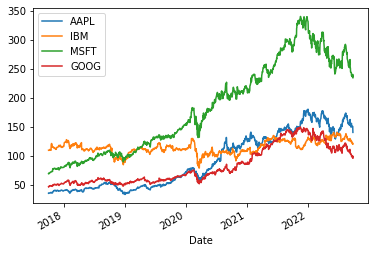

In [219]:
price.plot.line()

<AxesSubplot:xlabel='Date'>

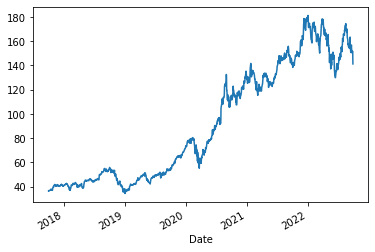

In [220]:
price['AAPL'].plot.line()

**Covariance** is a statistical measure of the directional relationship between two asset returns.  It measures whether stocks move in the same direction (a positive covariance) or in opposite directions (a negative covariance).  
  
**Correlation** the correlation provides additional information by determining the degree to which both variables move together. If the correlation is 1, they move perfectly together, and if the correlation is -1, the stocks move perfectly in opposite directions. If the correlation is 0, then the two stocks move in random directions from each other.  
  
In short, covariance tells you that two variables change the same way while correlation reveals how a change in one variable affects a change in the other. 
  
[Covariance and Correlation in portfolio management](https://www.investopedia.com/articles/financial-theory/11/calculating-covariance.asp)

In [221]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2022-09-23,-0.015124,-0.020749,-0.012698,-0.013921
2022-09-26,0.002260,-0.005704,-0.001975,-0.003630
2022-09-27,0.006566,-0.002213,-0.004380,-0.007287
2022-09-28,-0.012652,0.008379,0.019712,0.027016
2022-09-29,-0.057194,-0.012871,-0.023562,-0.038217


In [222]:
returns['MSFT'].cov(returns['IBM'])

0.00015732297825029923

In [223]:
returns['MSFT'].corr(returns['IBM'])

0.48333521242416666

<a id="Summarizing"></a>
### 5.3 Summarizing and Computing Descriptive Statistics 
pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame. Compared with the similar methods found on NumPy arrays, they have built-in handling for missing data.

Examples include:  
 - ***diff***: Compute first arithmetic difference  
 - ***pct_change***: percent change 
 - ***sum***: sum of values
 - ***mean***: mean of values

In [224]:
df = pd.DataFrame([[1.4, np.nan], 
                   [7.1, -4.5],
                   [np.nan, np.nan], 
                   [0.75, -1.3]],
                    index=['a', 'b', 'c', 'd'],
                    columns=['one', 'two'])


In [225]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Calling DataFrame’s sum method returns a Series containing column sums:

In [226]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Passing axis='columns' or axis=1 sums across the columns instead:

In [227]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA values are excluded unless the entire slice (row or column in this case) is NA. This can be disabled with the skipna option:
```python
df.mean(axis='columns', skipna=False)
```